## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    #'We use a list because it is convenient to use an ordered set of elements(mostly numerical) when compared 
    # to a set or dictionary where you need unique elements or elements assigned to values.'
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #'We need training data so that the machine can learn from the training data and apply it(whatever learned) 
    # to the testing data'
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # 'So that data can be analysed from a table, as a whole, especially if the data is not organised and from 
    #  different sources. More detailed analysis and operations can be performed on the data, like data filtering
    #  and classification.'
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    #'We process data so as to convert raw data which may or may not be usable to valuable data. If data is not
    # processed then the results can be misleading, like there might be outliers or errors in the data resulting
    # in a bad solution'
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # 'The number 10 is the number of binary features(i.e., values 0 or 1) which an attribute in this encoding
        #  scheme is converted to. This is then fed to the NN that improves the learning rate of the training data.
        #  Initially, this model contained 3 features, but now due to the binary encoding, it has 10 features.'
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [5]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

Using TensorFlow backend.


## Model Definition

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 960
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # 'We need a model here to define and organize the layers as needed(the dense layers). There are different types
    #  of models, but in our case we use a sequential model, which is the simplest.'
    
    # Why use Dense layer and then activation?
    # 'Dense layers are a big part of neural networks as the connect all the input to the output layers in the
    #  network. The main goal is to help the input vector by giving it the flexibility of performing linear
    #  operations(scaling, rotation, etc).'
    # 'Activation plays a very important role in Neural Networks. It basically converts an input signal of a node to 
    #  an output signal which is used as the input for the next layer. If this is not done, the Neural network will 
    #  simply be linear and will have the same functions as that of a linear regression model, which is completely
    #  redundant as the NN is supposed to solve very complex problems.'
    
    # Why use sequential model with layers?
    # 'A sequential model is a linear stack of layers and that is all we need in our model. We need this because our
    #  model is simple and not very complex. We do not have things like large dataset with intertwined datastreams,
    #  in which case we would use functional API(to reduce the complextiy)'
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # 'Drop-out is very important in NN. Drop-out means that the network 'drops out' some neurons randomly 
    #  (temporarily) from the training set. Because of this, the model is less likely to overfit.'
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # 'Softmax is an activation function that is utilized in the output layer and ranges from 0 to 1. It is basically
    #  used to normalize the data and sums all the outputs to 1. It goes hand in hand with logistic loss functions,
    #  like our case(categorical crossentropy).'
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # 'Our target variable is categorical and in a logistic format(Fizz, Buzz, FizzBuzz, Other)'
    model.compile(optimizer='adadelta',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [8]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 960)               10560     
_________________________________________________________________
activation_1 (Activation)    (None, 960)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 960)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 3844      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 14,404
Trainable params: 14,404
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [9]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 843us/step - loss: 1.2563 - acc: 0.5014 - val_loss: 1.1521 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 190us/step - loss: 1.1682 - acc: 0.5333 - val_loss: 1.1620 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 204us/step - loss: 1.1557 - acc: 0.5333 - val_loss: 1.1516 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 192us/step - loss: 1.1470 - acc: 0.5333 - val_loss: 1.1473 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 204us/step - loss: 1.1486 - acc: 0.5333 - val_loss: 1.1655 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 204us/step - loss: 1.1438 - acc: 0.5333 - val_loss: 1.1495 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 203us/step - loss: 1.1425 - acc: 0.5333 - val_loss: 1.1612 - val_acc: 0.

720/720 [==============================] - 0s 151us/step - loss: 0.9521 - acc: 0.5653 - val_loss: 1.0690 - val_acc: 0.5667
Epoch 61/10000
720/720 [==============================] - 0s 158us/step - loss: 0.9424 - acc: 0.5764 - val_loss: 1.0636 - val_acc: 0.5611
Epoch 62/10000
720/720 [==============================] - 0s 135us/step - loss: 0.9243 - acc: 0.6000 - val_loss: 1.0723 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 137us/step - loss: 0.9280 - acc: 0.5806 - val_loss: 1.0546 - val_acc: 0.5667
Epoch 64/10000
720/720 [==============================] - 0s 137us/step - loss: 0.9227 - acc: 0.5903 - val_loss: 1.0567 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 139us/step - loss: 0.9130 - acc: 0.5764 - val_loss: 1.0615 - val_acc: 0.5500
Epoch 66/10000
720/720 [==============================] - 0s 138us/step - loss: 0.9038 - acc: 0.5958 - val_loss: 1.0470 - val_acc: 0.5667
Epoch 67/10000
720/720 [=========================

720/720 [==============================] - 0s 141us/step - loss: 0.5824 - acc: 0.8403 - val_loss: 0.8161 - val_acc: 0.7444
Epoch 120/10000
720/720 [==============================] - 0s 138us/step - loss: 0.5757 - acc: 0.8389 - val_loss: 0.8331 - val_acc: 0.6111
Epoch 121/10000
720/720 [==============================] - 0s 138us/step - loss: 0.5695 - acc: 0.8236 - val_loss: 0.8108 - val_acc: 0.7556
Epoch 122/10000
720/720 [==============================] - 0s 135us/step - loss: 0.5689 - acc: 0.8139 - val_loss: 0.7971 - val_acc: 0.7556
Epoch 123/10000
720/720 [==============================] - 0s 136us/step - loss: 0.5778 - acc: 0.8333 - val_loss: 0.8076 - val_acc: 0.7500
Epoch 124/10000
720/720 [==============================] - 0s 137us/step - loss: 0.5631 - acc: 0.8389 - val_loss: 0.7911 - val_acc: 0.7944
Epoch 125/10000
720/720 [==============================] - 0s 148us/step - loss: 0.5534 - acc: 0.8472 - val_loss: 0.8145 - val_acc: 0.6444
Epoch 126/10000
720/720 [==================

720/720 [==============================] - 0s 136us/step - loss: 0.3601 - acc: 0.9264 - val_loss: 0.6166 - val_acc: 0.8278
Epoch 179/10000
720/720 [==============================] - 0s 135us/step - loss: 0.3573 - acc: 0.9139 - val_loss: 0.6092 - val_acc: 0.8389
Epoch 180/10000
720/720 [==============================] - 0s 141us/step - loss: 0.3631 - acc: 0.9208 - val_loss: 0.6377 - val_acc: 0.7778
Epoch 181/10000
720/720 [==============================] - 0s 134us/step - loss: 0.3494 - acc: 0.9250 - val_loss: 0.6432 - val_acc: 0.7444
Epoch 182/10000
720/720 [==============================] - 0s 137us/step - loss: 0.3502 - acc: 0.9153 - val_loss: 0.6112 - val_acc: 0.8556
Epoch 183/10000
720/720 [==============================] - 0s 145us/step - loss: 0.3556 - acc: 0.9181 - val_loss: 0.6060 - val_acc: 0.7722
Epoch 184/10000
720/720 [==============================] - 0s 138us/step - loss: 0.3332 - acc: 0.9389 - val_loss: 0.5910 - val_acc: 0.8444
Epoch 185/10000
720/720 [==================

720/720 [==============================] - 0s 143us/step - loss: 0.2655 - acc: 0.9417 - val_loss: 0.5715 - val_acc: 0.7444
Epoch 238/10000
720/720 [==============================] - 0s 148us/step - loss: 0.2487 - acc: 0.9444 - val_loss: 0.5197 - val_acc: 0.8000
Epoch 239/10000
720/720 [==============================] - 0s 140us/step - loss: 0.2467 - acc: 0.9458 - val_loss: 0.4999 - val_acc: 0.8556
Epoch 240/10000
720/720 [==============================] - 0s 140us/step - loss: 0.2497 - acc: 0.9500 - val_loss: 0.4868 - val_acc: 0.8611
Epoch 241/10000
720/720 [==============================] - 0s 147us/step - loss: 0.2377 - acc: 0.9569 - val_loss: 0.4737 - val_acc: 0.8722
Epoch 242/10000
720/720 [==============================] - 0s 141us/step - loss: 0.2581 - acc: 0.9431 - val_loss: 0.5210 - val_acc: 0.8000
Epoch 243/10000
720/720 [==============================] - 0s 139us/step - loss: 0.2473 - acc: 0.9486 - val_loss: 0.5219 - val_acc: 0.8111
Epoch 244/10000
720/720 [==================

720/720 [==============================] - 0s 140us/step - loss: 0.1915 - acc: 0.9556 - val_loss: 0.4148 - val_acc: 0.8778
Epoch 297/10000
720/720 [==============================] - 0s 137us/step - loss: 0.1815 - acc: 0.9736 - val_loss: 0.4565 - val_acc: 0.8167
Epoch 298/10000
720/720 [==============================] - 0s 138us/step - loss: 0.1664 - acc: 0.9778 - val_loss: 0.4680 - val_acc: 0.8222
Epoch 299/10000
720/720 [==============================] - 0s 140us/step - loss: 0.1772 - acc: 0.9708 - val_loss: 0.4291 - val_acc: 0.8611
Epoch 300/10000
720/720 [==============================] - 0s 141us/step - loss: 0.1705 - acc: 0.9736 - val_loss: 0.4510 - val_acc: 0.8167
Epoch 301/10000
720/720 [==============================] - 0s 139us/step - loss: 0.1775 - acc: 0.9667 - val_loss: 0.4568 - val_acc: 0.8167
Epoch 302/10000
720/720 [==============================] - 0s 139us/step - loss: 0.2007 - acc: 0.9486 - val_loss: 0.4500 - val_acc: 0.8167
Epoch 303/10000
720/720 [==================

720/720 [==============================] - 0s 145us/step - loss: 0.1383 - acc: 0.9736 - val_loss: 0.3568 - val_acc: 0.9056
Epoch 356/10000
720/720 [==============================] - 0s 144us/step - loss: 0.1480 - acc: 0.9750 - val_loss: 0.4103 - val_acc: 0.8778
Epoch 357/10000
720/720 [==============================] - 0s 142us/step - loss: 0.1221 - acc: 0.9778 - val_loss: 0.4169 - val_acc: 0.8500
Epoch 358/10000
720/720 [==============================] - 0s 142us/step - loss: 0.1548 - acc: 0.9653 - val_loss: 0.3608 - val_acc: 0.9000
Epoch 359/10000
720/720 [==============================] - 0s 143us/step - loss: 0.1443 - acc: 0.9778 - val_loss: 0.4013 - val_acc: 0.8611
Epoch 360/10000
720/720 [==============================] - 0s 144us/step - loss: 0.1463 - acc: 0.9681 - val_loss: 0.4007 - val_acc: 0.8778
Epoch 361/10000
720/720 [==============================] - 0s 142us/step - loss: 0.1494 - acc: 0.9792 - val_loss: 0.3782 - val_acc: 0.8722
Epoch 362/10000
720/720 [==================

720/720 [==============================] - 0s 141us/step - loss: 0.1180 - acc: 0.9764 - val_loss: 0.3733 - val_acc: 0.8667
Epoch 415/10000
720/720 [==============================] - 0s 139us/step - loss: 0.1176 - acc: 0.9792 - val_loss: 0.4176 - val_acc: 0.8111
Epoch 416/10000
720/720 [==============================] - 0s 140us/step - loss: 0.1098 - acc: 0.9764 - val_loss: 0.3239 - val_acc: 0.9111
Epoch 417/10000
720/720 [==============================] - 0s 141us/step - loss: 0.1168 - acc: 0.9819 - val_loss: 0.3277 - val_acc: 0.9000
Epoch 418/10000
720/720 [==============================] - 0s 141us/step - loss: 0.1094 - acc: 0.9792 - val_loss: 0.3117 - val_acc: 0.9056
Epoch 419/10000
720/720 [==============================] - 0s 142us/step - loss: 0.1048 - acc: 0.9819 - val_loss: 0.3109 - val_acc: 0.9056
Epoch 420/10000
720/720 [==============================] - 0s 142us/step - loss: 0.1147 - acc: 0.9778 - val_loss: 0.3283 - val_acc: 0.9056
Epoch 421/10000
720/720 [==================

720/720 [==============================] - 0s 146us/step - loss: 0.0956 - acc: 0.9861 - val_loss: 0.3102 - val_acc: 0.9000
Epoch 474/10000
720/720 [==============================] - 0s 143us/step - loss: 0.1036 - acc: 0.9736 - val_loss: 0.2976 - val_acc: 0.9167
Epoch 475/10000
720/720 [==============================] - 0s 145us/step - loss: 0.0970 - acc: 0.9750 - val_loss: 0.4347 - val_acc: 0.8111
Epoch 476/10000
720/720 [==============================] - 0s 143us/step - loss: 0.1039 - acc: 0.9750 - val_loss: 0.3386 - val_acc: 0.8667
Epoch 477/10000
720/720 [==============================] - 0s 144us/step - loss: 0.0966 - acc: 0.9792 - val_loss: 0.3048 - val_acc: 0.9000
Epoch 478/10000
720/720 [==============================] - 0s 142us/step - loss: 0.0996 - acc: 0.9806 - val_loss: 0.2861 - val_acc: 0.9278
Epoch 479/10000
720/720 [==============================] - 0s 144us/step - loss: 0.1003 - acc: 0.9861 - val_loss: 0.3431 - val_acc: 0.8667
Epoch 480/10000
720/720 [==================

720/720 [==============================] - 0s 145us/step - loss: 0.0783 - acc: 0.9875 - val_loss: 0.2596 - val_acc: 0.9222
Epoch 533/10000
720/720 [==============================] - 0s 141us/step - loss: 0.1045 - acc: 0.9708 - val_loss: 0.2641 - val_acc: 0.9167
Epoch 534/10000
720/720 [==============================] - 0s 150us/step - loss: 0.0834 - acc: 0.9847 - val_loss: 0.3475 - val_acc: 0.8611
Epoch 535/10000
720/720 [==============================] - 0s 140us/step - loss: 0.0851 - acc: 0.9792 - val_loss: 0.3249 - val_acc: 0.8833
Epoch 536/10000
720/720 [==============================] - 0s 140us/step - loss: 0.0892 - acc: 0.9792 - val_loss: 0.2818 - val_acc: 0.9111
Epoch 537/10000
720/720 [==============================] - 0s 140us/step - loss: 0.0933 - acc: 0.9806 - val_loss: 0.3661 - val_acc: 0.8611
Epoch 538/10000
720/720 [==============================] - 0s 141us/step - loss: 0.1006 - acc: 0.9792 - val_loss: 0.2955 - val_acc: 0.9000
Epoch 539/10000
720/720 [==================

720/720 [==============================] - 0s 144us/step - loss: 0.0790 - acc: 0.9861 - val_loss: 0.2496 - val_acc: 0.9222
Epoch 592/10000
720/720 [==============================] - 0s 141us/step - loss: 0.0833 - acc: 0.9889 - val_loss: 0.2837 - val_acc: 0.9000
Epoch 593/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0867 - acc: 0.9806 - val_loss: 0.3080 - val_acc: 0.8889
Epoch 594/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0904 - acc: 0.9847 - val_loss: 0.2670 - val_acc: 0.9111
Epoch 595/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0804 - acc: 0.9833 - val_loss: 0.3227 - val_acc: 0.8833
Epoch 596/10000
720/720 [==============================] - 0s 142us/step - loss: 0.0735 - acc: 0.9861 - val_loss: 0.3283 - val_acc: 0.8722
Epoch 597/10000
720/720 [==============================] - 0s 142us/step - loss: 0.0810 - acc: 0.9778 - val_loss: 0.2637 - val_acc: 0.9111
Epoch 598/10000
720/720 [==================

720/720 [==============================] - 0s 142us/step - loss: 0.0736 - acc: 0.9833 - val_loss: 0.2895 - val_acc: 0.9000
Epoch 651/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0608 - acc: 0.9847 - val_loss: 0.2935 - val_acc: 0.8833
Epoch 652/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0630 - acc: 0.9917 - val_loss: 0.3435 - val_acc: 0.8611
Epoch 653/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0613 - acc: 0.9903 - val_loss: 0.2682 - val_acc: 0.9111
Epoch 654/10000
720/720 [==============================] - 0s 138us/step - loss: 0.0683 - acc: 0.9819 - val_loss: 0.3399 - val_acc: 0.8611
Epoch 655/10000
720/720 [==============================] - 0s 142us/step - loss: 0.0682 - acc: 0.9833 - val_loss: 0.2989 - val_acc: 0.8889
Epoch 656/10000
720/720 [==============================] - 0s 141us/step - loss: 0.0654 - acc: 0.9889 - val_loss: 0.2571 - val_acc: 0.8944
Epoch 657/10000
720/720 [==================

720/720 [==============================] - 0s 148us/step - loss: 0.0597 - acc: 0.9889 - val_loss: 0.2526 - val_acc: 0.9056
Epoch 710/10000
720/720 [==============================] - 0s 151us/step - loss: 0.0564 - acc: 0.9903 - val_loss: 0.2190 - val_acc: 0.9333
Epoch 711/10000
720/720 [==============================] - 0s 158us/step - loss: 0.0559 - acc: 0.9875 - val_loss: 0.2613 - val_acc: 0.9000
Epoch 712/10000
720/720 [==============================] - 0s 172us/step - loss: 0.0545 - acc: 0.9917 - val_loss: 0.3660 - val_acc: 0.8611
Epoch 713/10000
720/720 [==============================] - 0s 166us/step - loss: 0.0608 - acc: 0.9847 - val_loss: 0.2468 - val_acc: 0.9111
Epoch 714/10000
720/720 [==============================] - 0s 145us/step - loss: 0.0641 - acc: 0.9875 - val_loss: 0.2424 - val_acc: 0.9167
Epoch 715/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0592 - acc: 0.9889 - val_loss: 0.2403 - val_acc: 0.9167
Epoch 716/10000
720/720 [==================

720/720 [==============================] - 0s 174us/step - loss: 0.0461 - acc: 0.9958 - val_loss: 0.2697 - val_acc: 0.8944
Epoch 769/10000
720/720 [==============================] - 0s 156us/step - loss: 0.0759 - acc: 0.9764 - val_loss: 0.3353 - val_acc: 0.8722
Epoch 770/10000
720/720 [==============================] - 0s 157us/step - loss: 0.0581 - acc: 0.9889 - val_loss: 0.3075 - val_acc: 0.8833
Epoch 771/10000
720/720 [==============================] - 0s 158us/step - loss: 0.0528 - acc: 0.9889 - val_loss: 0.2667 - val_acc: 0.9056
Epoch 772/10000
720/720 [==============================] - 0s 152us/step - loss: 0.0492 - acc: 0.9917 - val_loss: 0.3465 - val_acc: 0.8667
Epoch 773/10000
720/720 [==============================] - 0s 172us/step - loss: 0.0692 - acc: 0.9778 - val_loss: 0.2316 - val_acc: 0.9167
Epoch 774/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0537 - acc: 0.9889 - val_loss: 0.2377 - val_acc: 0.9056
Epoch 775/10000
720/720 [==================

720/720 [==============================] - 0s 142us/step - loss: 0.0472 - acc: 0.9889 - val_loss: 0.2971 - val_acc: 0.8889
Epoch 828/10000
720/720 [==============================] - 0s 141us/step - loss: 0.0491 - acc: 0.9917 - val_loss: 0.2853 - val_acc: 0.8833
Epoch 829/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0545 - acc: 0.9875 - val_loss: 0.2719 - val_acc: 0.8944
Epoch 830/10000
720/720 [==============================] - 0s 135us/step - loss: 0.0524 - acc: 0.9917 - val_loss: 0.2289 - val_acc: 0.9222
Epoch 831/10000
720/720 [==============================] - 0s 135us/step - loss: 0.0421 - acc: 0.9944 - val_loss: 0.3034 - val_acc: 0.8722
Epoch 832/10000
720/720 [==============================] - 0s 137us/step - loss: 0.0509 - acc: 0.9917 - val_loss: 0.2570 - val_acc: 0.9000
Epoch 833/10000
720/720 [==============================] - 0s 138us/step - loss: 0.0452 - acc: 0.9917 - val_loss: 0.2477 - val_acc: 0.9056
Epoch 834/10000
720/720 [==================

720/720 [==============================] - 0s 138us/step - loss: 0.0440 - acc: 0.9931 - val_loss: 0.2458 - val_acc: 0.9167
Epoch 887/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0570 - acc: 0.9833 - val_loss: 0.2842 - val_acc: 0.9000
Epoch 888/10000
720/720 [==============================] - 0s 137us/step - loss: 0.0470 - acc: 0.9889 - val_loss: 0.2187 - val_acc: 0.9167
Epoch 889/10000
720/720 [==============================] - 0s 138us/step - loss: 0.0591 - acc: 0.9861 - val_loss: 0.2716 - val_acc: 0.9000
Epoch 890/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0510 - acc: 0.9833 - val_loss: 0.2202 - val_acc: 0.9500
Epoch 891/10000
720/720 [==============================] - 0s 140us/step - loss: 0.0535 - acc: 0.9903 - val_loss: 0.2220 - val_acc: 0.9111
Epoch 892/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0481 - acc: 0.9931 - val_loss: 0.2686 - val_acc: 0.9056
Epoch 893/10000
720/720 [==================

720/720 [==============================] - 0s 140us/step - loss: 0.0453 - acc: 0.9903 - val_loss: 0.2879 - val_acc: 0.8833
Epoch 946/10000
720/720 [==============================] - 0s 138us/step - loss: 0.0506 - acc: 0.9833 - val_loss: 0.2488 - val_acc: 0.8944
Epoch 947/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0453 - acc: 0.9903 - val_loss: 0.3461 - val_acc: 0.8667
Epoch 948/10000
720/720 [==============================] - 0s 139us/step - loss: 0.0528 - acc: 0.9875 - val_loss: 0.3108 - val_acc: 0.8889
Epoch 949/10000
720/720 [==============================] - 0s 137us/step - loss: 0.0575 - acc: 0.9875 - val_loss: 0.2667 - val_acc: 0.8889
Epoch 950/10000
720/720 [==============================] - 0s 137us/step - loss: 0.0457 - acc: 0.9917 - val_loss: 0.2664 - val_acc: 0.9056
Epoch 951/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0559 - acc: 0.9889 - val_loss: 0.2476 - val_acc: 0.9056
Epoch 952/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb313e0438>,
      dtype=object)

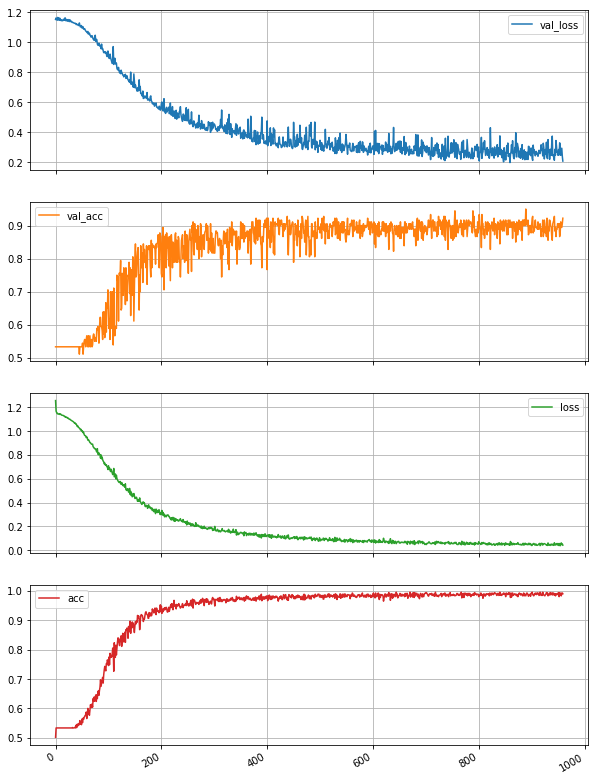

In [10]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [11]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [12]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "yashahuj")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50245092")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 0  Correct :100
Testing Accuracy: 100.0
